B 0/98 765432165# **APLICAÇÕES DE BIG DATA E DATA SCIENCE COM FOCO EM MARKETING**

**prof: Sergio Assuncao Monteiro, DSc**

linkedin: https://www.linkedin.com/in/sergio-assun%C3%A7%C3%A3o-monteiro-b781897b/

lattes: http://lattes.cnpq.br/9489191035734025


?# **Exemplo 01: Séries temporais**

In [ ]:
 vnrcexq  import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


# Gerar dados de exemplo
np.random.seed(0)
data = {
    'Data': pd.date_range('2022-01-01', '2022-12-31', freq='D'),
    'Valor': np.random.randint(100, 500, size=365) + np.sin(np.linspace(0, 2*np.pi, 365)) * 100 + np.sin(np.linspace(0, 4*np.pi, 365)) * 50
}

df = pd.DataFrame(data)

# Converter a coluna 'Data' para tipo datetime
df['Data'] = pd.to_datetime(df['Data'])

# Decompor a série temporal em componentes
decomp = seasonal_decompose(df['Valor'], model='additive', period=30)

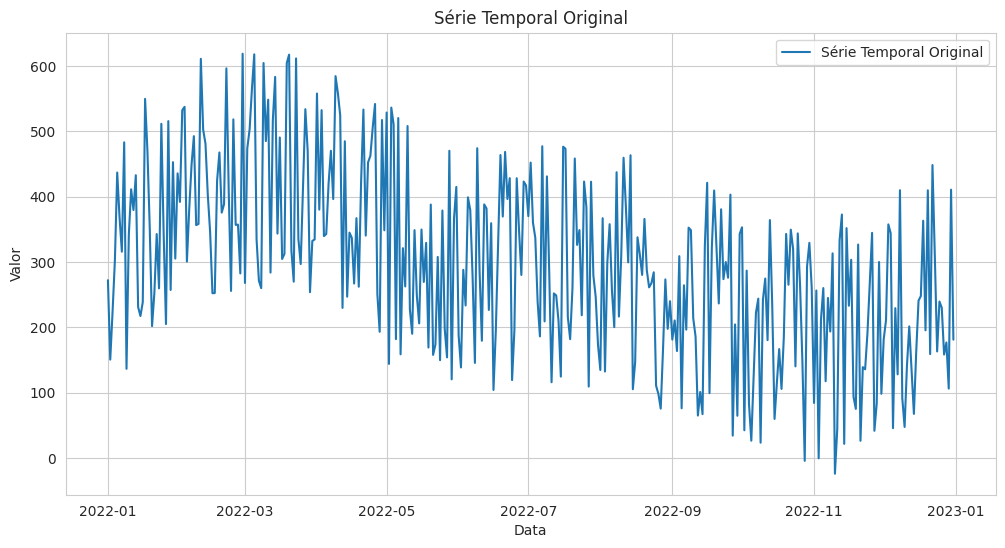

In [ ]:
# Plotar a série temporal original
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.lineplot(x=df['Data'], y=df['Valor'], label='Série Temporal Original')
plt.title('Série Temporal Original')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()

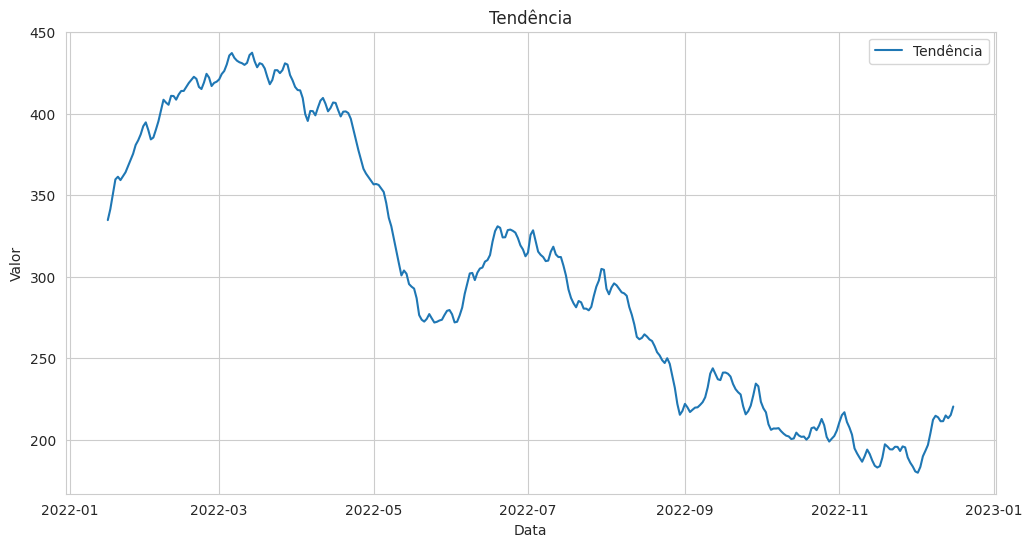

In [ ]:
# Plotar a tendência
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.lineplot(x=df['Data'], y=decomp.trend, label='Tendência')
plt.title('Tendência')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()

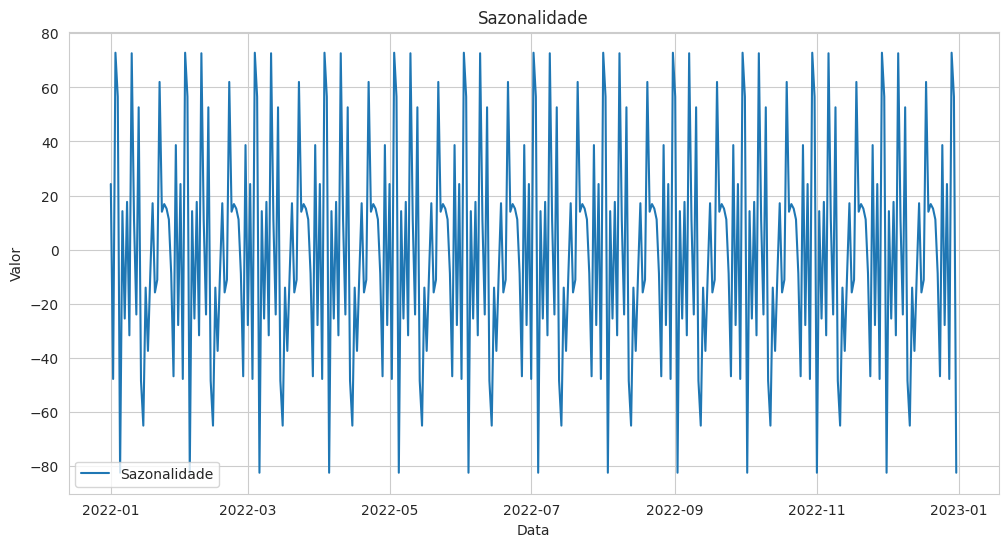

In [ ]:
# Plotar a sazonalidade
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.lineplot(x=df['Data'], y=decomp.seasonal, label='Sazonalidade')
plt.title('Sazonalidade')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()

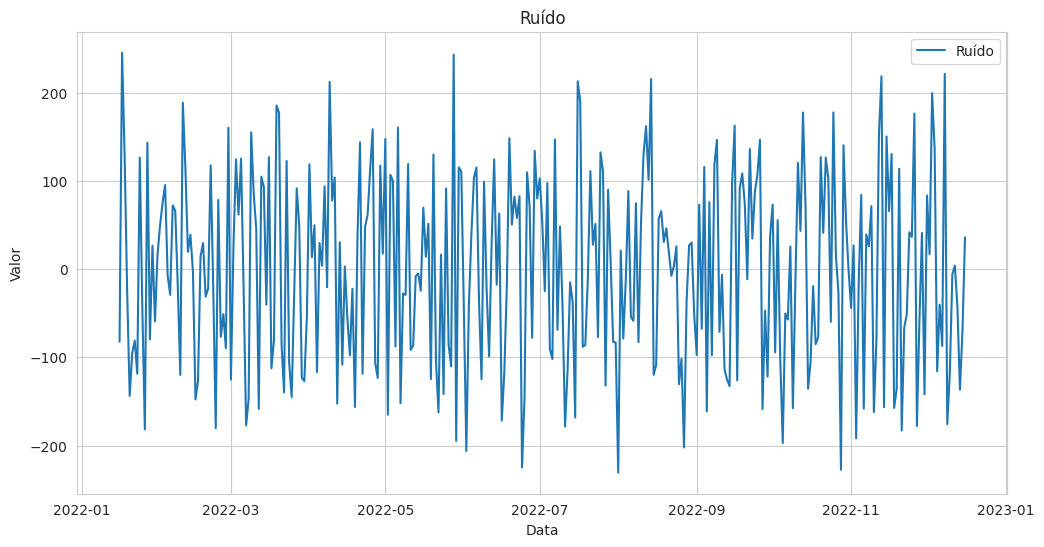

In [ ]:
# Plotar o ruído
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.lineplot(x=df['Data'], y=decomp.resid, label='Ruído')
plt.title('Ruído')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()

# **Exemplo 02: Análise da Distribuição de Idades de Consumidores**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gerando dados fictícios
np.random.seed(42)

# Definir o número de consumidores e o período de tempo (12 meses)
n_consumidores_por_mes = 500
meses = pd.date_range(start='2023-01-01', periods=12, freq='M')

# Função para gerar idades aleatórias com uma distribuição normal
def gerar_idades(n):
    return np.clip(np.random.normal(loc=35, scale=10, size=n), 18, 70).round()

# Criar um DataFrame com idades para cada mês
dados = []
for mes in meses:
    idades = gerar_idades(n_consumidores_por_mes)
    dados.append(pd.DataFrame({'Mês': [mes] * n_consumidores_por_mes, 'Idade': idades}))

# Concatenar os dados em um único DataFrame
dados_consumidores = pd.concat(dados)

# Resumo da distribuição de idades ao longo do tempo
media_idades = dados_consumidores.groupby('Mês')['Idade'].mean().reset_index()


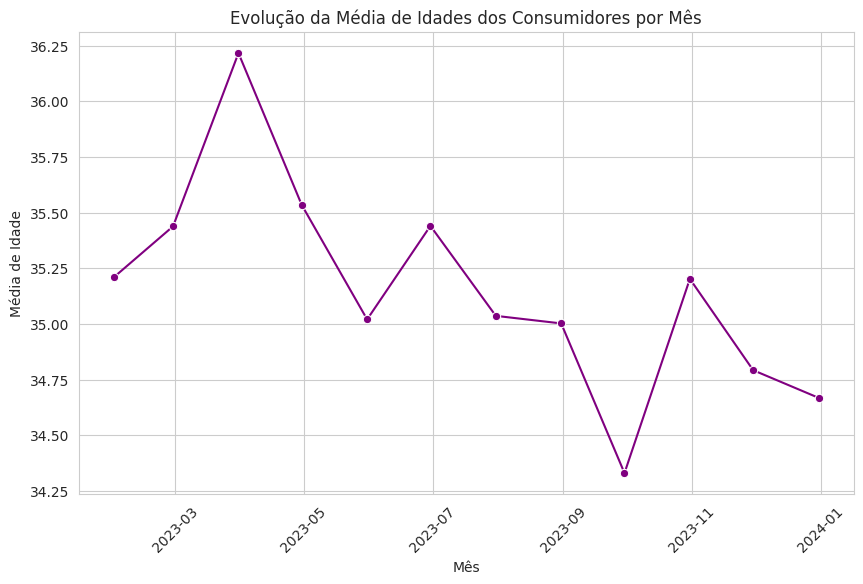

In [ ]:
# Visualização: Média de Idades por Mês
plt.figure(figsize=(10, 6))
sns.lineplot(data=media_idades, x='Mês', y='Idade', marker='o', color='purple')
plt.title('Evolução da Média de Idades dos Consumidores por Mês')
plt.xlabel('Mês')
plt.ylabel('Média de Idade')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

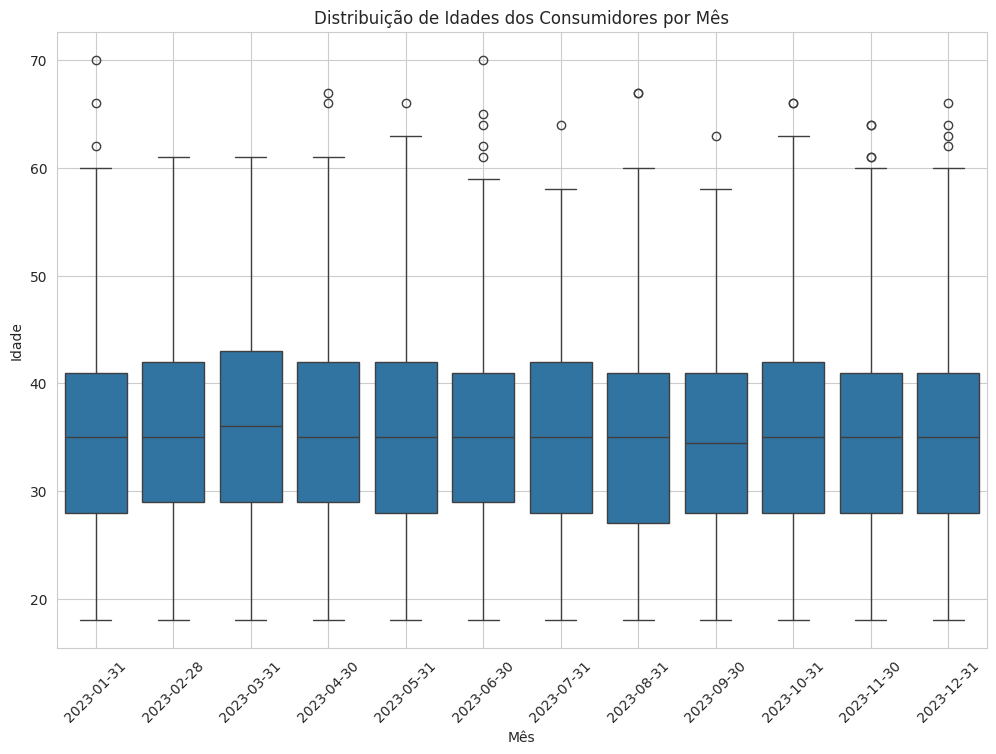

In [ ]:
# Visualização: Distribuição das Idades em Cada Mês
plt.figure(figsize=(12, 8))
sns.boxplot(data=dados_consumidores, x='Mês', y='Idade')
plt.title('Distribuição de Idades dos Consumidores por Mês')
plt.xlabel('Mês')
plt.ylabel('Idade')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# **Exemplo 03: Análise de Séries Temporais de Vendas**

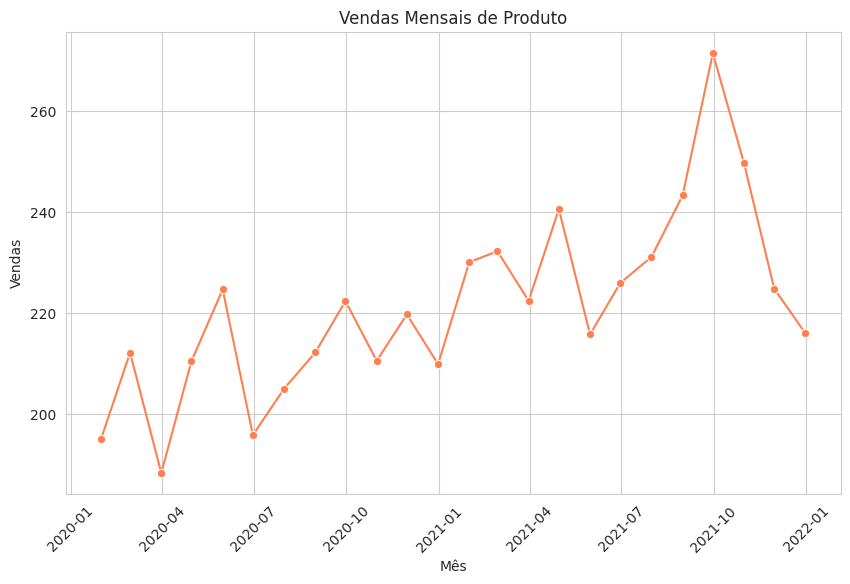

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Gerando dados fictícios de vendas mensais
np.random.seed(42)
meses = pd.date_range(start='2020-01-01', periods=24, freq='ME')  # Usando 'ME' ao invés de 'M'
vendas = np.random.poisson(lam=200, size=len(meses)) + np.linspace(0, 50, len(meses))

# Criando o DataFrame
dados_vendas = pd.DataFrame({'Mês': meses, 'Vendas': vendas})

# Visualização: Séries Temporais de Vendas
plt.figure(figsize=(10, 6))
sns.lineplot(data=dados_vendas, x='Mês', y='Vendas', marker='o', color='coral')
plt.title('Vendas Mensais de Produto')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# **Exemplo 04: Análise Preditiva de Vendas com Regressão Linear**

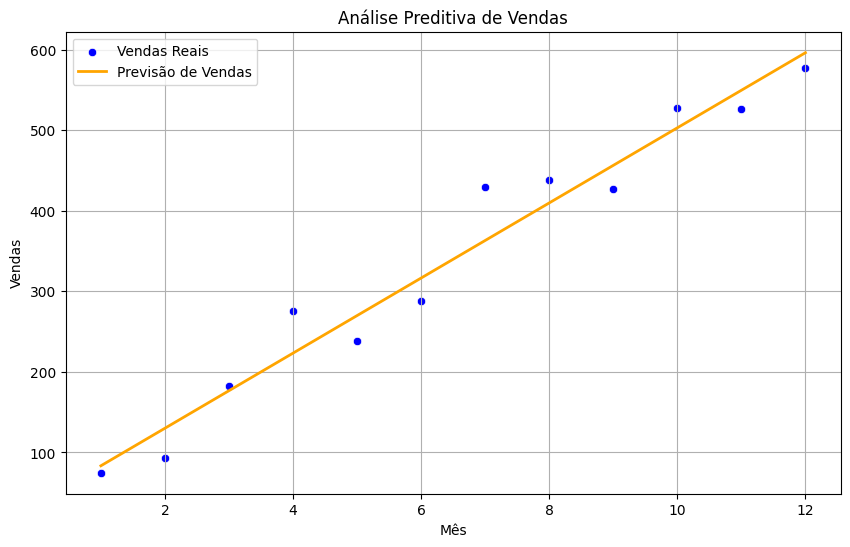

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Gerando dados fictícios
np.random.seed(42)
meses = np.arange(1, 13)
vendas = 50 * meses + np.random.normal(loc=0, scale=50, size=len(meses))

# Criando o DataFrame
dados_vendas = pd.DataFrame({'Mes': meses, 'Vendas': vendas})

# Modelo de Regressão Linear
modelo = LinearRegression()
modelo.fit(dados_vendas[['Mes']], dados_vendas['Vendas'])

# Previsões
dados_vendas['Previsao'] = modelo.predict(dados_vendas[['Mes']])

# Visualização: Vendas e Previsão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados_vendas, x='Mes', y='Vendas', color='blue', label='Vendas Reais')
sns.lineplot(data=dados_vendas, x='Mes', y='Previsao', color='orange', label='Previsão de Vendas', linewidth=2)
plt.title('Análise Preditiva de Vendas')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.legend()
plt.grid(True)
plt.show()


# **Exemplo 05: Comportamento do Consumidor por Tipo de Pagamento**

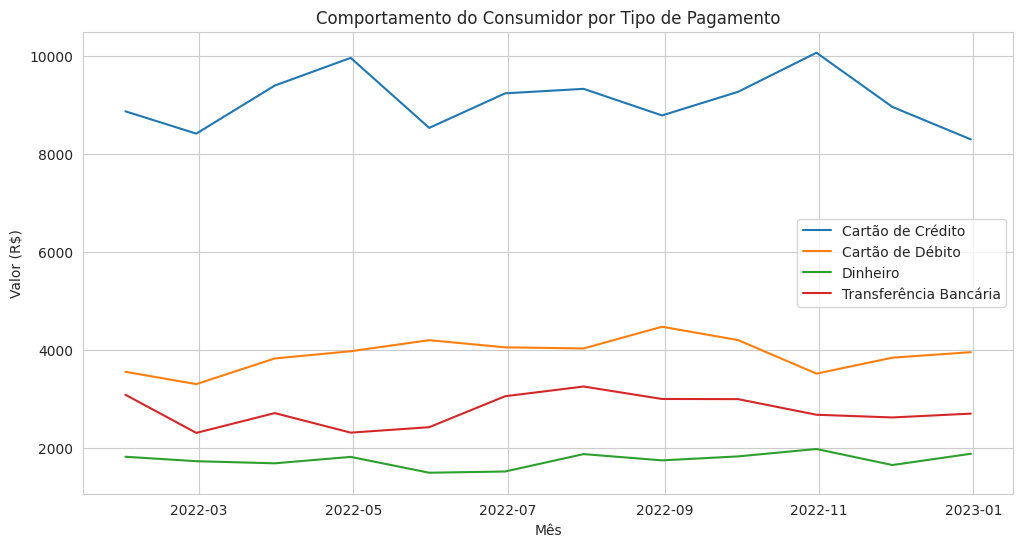

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Gerar dados de exemplo
np.random.seed(0)
data = {
    'Data': pd.date_range('2022-01-01', '2022-12-31', freq='D'),
    'Cartão de Crédito': np.random.randint(100, 500, size=365),
    'Cartão de Débito': np.random.randint(50, 200, size=365),
    'Dinheiro': np.random.randint(20, 100, size=365),
    'Transferência Bancária': np.random.randint(30, 150, size=365)
}

df = pd.DataFrame(data)

# Converter a coluna 'Data' para tipo datetime
df['Data'] = pd.to_datetime(df['Data'])

# Agrupar os dados por mês e calcular a soma dos valores
df_mes = df.groupby(pd.Grouper(key='Data', freq='ME')).sum()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_mes.index, df_mes['Cartão de Crédito'], label='Cartão de Crédito')
plt.plot(df_mes.index, df_mes['Cartão de Débito'], label='Cartão de Débito')
plt.plot(df_mes.index, df_mes['Dinheiro'], label='Dinheiro')
plt.plot(df_mes.index, df_mes['Transferência Bancária'], label='Transferência Bancária')
plt.xlabel('Mês')
plt.ylabel('Valor (R$)')
plt.title('Comportamento do Consumidor por Tipo de Pagamento')
plt.legend()
plt.show()